# Imports

In [2]:
#from IBMTools import( 
#        simul,
#        savefig,
#        saveMultipleHist,
#        printDict,
#        plotMultipleQiskit,
#        plotMultipleQiskitGrover)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from qiskit import( ClassicalRegister,
        QuantumRegister,
        QuantumCircuit,
        execute,
        Aer,
        transpile
        )
from qiskit.visualization import( plot_histogram,
        plot_state_city)
mpl.rcParams['figure.figsize'] = 11,8
mpl.rcParams.update({'font.size' : 15})
    

# Grover Funcs

In [7]:
def markedListGrover(markedList,N):
    oracleList = np.ones(2**N)
    for element in markedList:
        oracleList[element] = -1
    return oracleList.tolist()

def getOracle(markedList,N):
    oracleList = np.eye(2**N)
    for element in markedList:
        oracleList[element][element] = -1
    return oracleList

def oracleGrover(markedList,N):
    qreg = QuantumRegister(N)
    qc = QuantumCircuit(qreg,name='    Oracle    ')
    qc.diagonal(markedList,qreg)
    qc=transpile(qc,optimization_level=3)
    return qc

def diffusionGrover(N):
    qreg = QuantumRegister(N)
    difCirc = QuantumCircuit(qreg,name='     Diff    ')
    difCirc.h(qreg)
    aux = markedListGrover([0],N)
    qcAux = oracleGrover(aux,N)
    difCirc.append(qcAux,range(N))
    difCirc.h(qreg)
    difCirc=transpile(difCirc,optimization_level=3)
    return difCirc

def grover(N,steps,marked):
    qc = QuantumCircuit(N,N)
    qcOracle = oracleGrover(markedListGrover(marked,N),N)
    qcDiffusion = diffusionGrover(N)
    qc.h(range(N))
    qc.barrier()
    for i in range(steps):
        qc.append(qcOracle,range(N))
        qc.barrier()
        qc.append(qcDiffusion,range(N))
        qc.barrier()
    qc.measure(range(N),range(N))
    qc = transpile(qc,optimization_level=1)
    return qc

# Implementation

In [19]:
def simul(qc,stateVec,shots):
    if stateVec:
        backend = Aer.get_backend('statevector_simulator')
        result = execute(qc,backend,shots=shots).result().get_statevector(qc,decimals=3)
    else:
        backend = Aer.get_backend('qasm_simulator')
        result = execute(qc,backend,shots=shots).result().get_counts()
    return result

## N = 3

### Marked=1

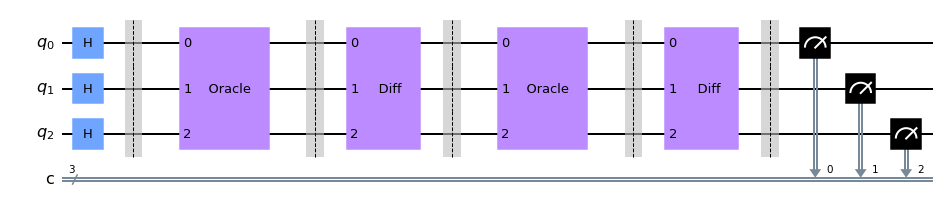

In [15]:
N=3
marked = [int((2**N -1)/2)]
steps =int((np.pi /4) * np.sqrt(2**N/len(marked)))
groverCirc = grover(N,steps,marked)
groverCirc.draw(output='mpl')

### Marked=2 (SingleShot)

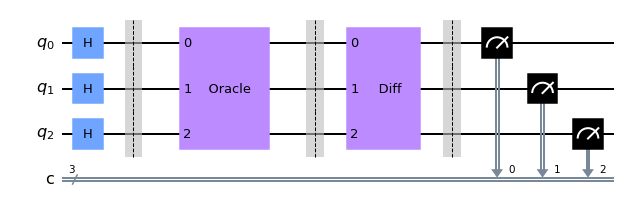

In [16]:
N=3
marked = [0,2**N -1]
steps =int((np.pi /4) * np.sqrt(2**N/len(marked)))
groverCirc = grover(N,steps,marked)
groverCirc.draw(output='mpl')

## N = 4

### Marked=1

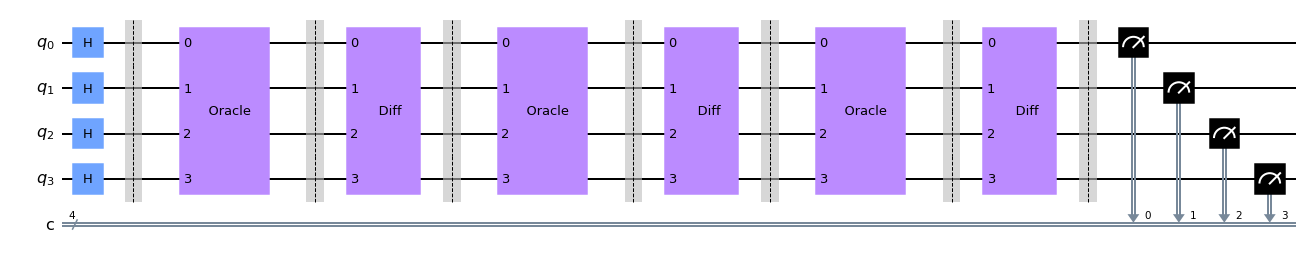

In [18]:
N=4
marked = [0]
steps =int((np.pi /4) * np.sqrt(2**N/len(marked)))
groverCirc = grover(N,steps,marked)
groverCirc.draw(output='mpl',fold=-1)